In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [75]:
df=pd.read_csv('/kaggle/input/kag-risk/kag_risk_factors_cervical_cancer.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [76]:
df_na = df.replace('?', np.nan)
df_na.isnull().sum() 
df = df_na  
df1 = df._convert(numeric=True)

In [77]:
H = df1['Hinselmann'].T.sum()
S = df1['Schiller'].T.sum()
C = df1['Citology'].T.sum()
B = df1['Biopsy'].T.sum()
H+S+C+B

208

In [78]:
df1.columns = df1.columns.str.replace(' ', '')
df1.drop(['STDs:Timesincefirstdiagnosis','STDs:Timesincelastdiagnosis','STDs:cervicalcondylomatosis','STDs:AIDS'],inplace=True,axis=1)
df1.isnull().T.any().T.sum()

190

In [79]:
df = df1[df1.isnull().sum(axis=1) < 10]
df.shape

(753, 32)

In [80]:
# from sklearn.decomposition import PCA
# pca = PCA()
# X_Hinselmann = pca.fit_transform(X_Hinselmann)
# X_Schiller = pca.fit_transform(X_Schiller)
# X_Cytology = pca.fit_transform(X_Cytology)
# X_Biopsy = pca.fit_transform(X_Biopsy)

In [81]:
numerical_df = ['Age', 'Numberofsexualpartners', 'Firstsexualintercourse','Numofpregnancies', 'Smokes(years)',
                'Smokes(packs/year)','HormonalContraceptives(years)','IUD(years)','STDs(number)']
categorical_df = ['Smokes','HormonalContraceptives','IUD','STDs','STDs:condylomatosis',
                  'STDs:vulvo-perinealcondylomatosis', 'STDs:syphilis','STDs:pelvicinflammatorydisease', 'STDs:genitalherpes',
                  'STDs:molluscumcontagiosum','STDs:HIV','STDs:HepatitisB', 'STDs:HPV', 'STDs:Numberofdiagnosis',
                  'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

In [82]:
df

,Age,Numberofsexualpartners,Firstsexualintercourse,Numofpregnancies,Smokes,Smokes(years),Smokes(packs/year),HormonalContraceptives,HormonalContraceptives(years),IUD,...,STDs:HPV,STDs:Numberofdiagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [83]:
for feature in numerical_df:
    print(feature,'',df[feature]._convert(numeric=True).mean())
    feature_mean = round(df[feature]._convert(numeric=True).mean(),1)
    df[feature] = df[feature].fillna(feature_mean)

Age  27.228419654714475
Numberofsexualpartners  2.5290933694181326
Firstsexualintercourse  17.089692101740294
Numofpregnancies  2.31728045325779
Smokes(years)  1.2272727791493943
Smokes(packs/year)  0.46430770882920597
HormonalContraceptives(years)  2.2120194608675674
IUD(years)  0.5175983717774763
STDs(number)  0.17662682602921648


In [84]:
for feature in categorical_df:
    
    df[feature] = df[feature]._convert(numeric=True).fillna(0.0)

In [85]:
df5 = df.copy()

In [86]:
df5['YAFSI'] = df5['Age'] - df5['Firstsexualintercourse']
df5['CNT'] = df.astype(bool).sum(axis=1)
df5['SEX'] = (df5['Numofpregnancies']+1) * (df5['Numberofsexualpartners']+1)
df5['FirstSexZ'] = (((df5['Firstsexualintercourse']+1) - (df5.loc[:,'Firstsexualintercourse'].mean())+1) / (df5.loc[:,'Firstsexualintercourse'].var()+1)*100)
df5['SexZ'] = (((df5['Numberofsexualpartners']+1) - (df5.loc[:,'Numberofsexualpartners'].mean())+1) / (df5.loc[:,'Numberofsexualpartners'].var()+1)*100)
df5['PILL'] = (((df5['HormonalContraceptives(years)']+1) - (df5.loc[:,'HormonalContraceptives(years)'].mean())+1) / (df5.loc[:,'HormonalContraceptives(years)'].var()+1)*100)
df5['SSY'] = df5['Age'] - df5['Smokes(years)']
df5['SPYP'] = df5['Numberofsexualpartners'] / df5['YAFSI']
df5['SP'] = df5['Smokes(years)'] / df5['Age']
df5['HCP'] = df5['HormonalContraceptives(years)'] / df5['Age']
df5['STDP'] = df5['STDs(number)'] / df5['Age']
df5['IUDP'] = df5['IUD(years)'] / df5['Age']
df5['TSP'] = df5['Smokes(packs/year)'] * df5['Smokes(years)']
df5['NPP'] = df5['Numofpregnancies'] / df5['Age']
df5['NSPP'] = df5['Numberofsexualpartners'] / df5['Age']
df5['NDP'] = df5['STDs:Numberofdiagnosis'] / df5['Age']
df5['YAHC'] = df5['Age'] - df5['HormonalContraceptives(years)']
df5['YAIUD'] = df5['Age'] - df5['IUD(years)']
df5['NPSP'] = df5['Numofpregnancies'] / df5['Numberofsexualpartners']
df5['IUDSY'] = df5['IUD(years)'] / df5['YAFSI']
df5['HCSY'] = df5['HormonalContraceptives(years)'] / df5['YAFSI']

In [87]:
df5.replace([np.inf, -np.inf], np.nan, inplace = True) #deleting extreme values caused by calculations

In [88]:
df = df5.copy()

In [89]:
numerical_df = ['Age', 'Numberofsexualpartners', 'Firstsexualintercourse','Numofpregnancies', 'Smokes(years)',
                'Smokes(packs/year)','HormonalContraceptives(years)','IUD(years)','STDs(number)', 'YAFSI', 'CNT',
                'FirstSexZ', 'SexZ', 'PILL','SSY','SPYP', 'SP', 'HCP', 'STDP', 'IUDP', 'TSP', 'NPP', 'NSPP', 'NDP',
                'YAHC', 'YAIUD', 'NPSP', 'IUDSY', 'HCSY']

In [90]:
for feature in numerical_df:
    print(feature,'',df[feature]._convert(numeric=True).mean())
    feature_mean = round(df[feature]._convert(numeric=True).mean(),1)
    df[feature] = df[feature].fillna(feature_mean)

Age  27.228419654714475
Numberofsexualpartners  2.5285524568393094
Firstsexualintercourse  17.08977423638778
Numofpregnancies  2.3162018592297478
Smokes(years)  1.2269105908472775
Smokes(packs/year)  0.4647817100399735
HormonalContraceptives(years)  2.211811953575033
IUD(years)  0.5172244355909694
STDs(number)  0.17662682602921648
YAFSI  10.138645418326693
CNT  6.7822045152722445
FirstSexZ  22.166572394978484
SexZ  52.84357231828712
PILL  14.304617150310163
SSY  26.0015090638672
SPYP  0.43428884684664437
SP  0.04065969536011289
HCP  0.07524249045193483
STDP  0.007143610386861711
IUDP  0.01589706902846583
TSP  7.3192223272545265
NPP  0.08495802794366394
NSPP  0.0993921170754189
NDP  0.0040300269888502
YAHC  25.016607701139442
YAIUD  26.711195219123503
NPSP  1.1571190370791964
IUDSY  0.03550737084126299
HCSY  0.24031459947469885


In [91]:
df.columns[df.isna().any()].tolist()

[]

In [92]:
df['Age'] = np.clip(df['Age'], a_max=58, a_min=None)

In [93]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

In [94]:
target_Hin = df['Hinselmann'] 
target_Sch = df['Schiller'] 
target_Cit = df['Citology'] 
target_Bio = df['Biopsy']

In [95]:
df = df.drop(columns=['Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'Dx', 'Dx:Cancer', 'Smokes(years)', 'Smokes(packs/year)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x718b33b96d10>,
 'caps': [<matplotlib.lines.Line2D at 0x718b33af7cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x718b33b96710>],
 'medians': [<matplotlib.lines.Line2D at 0x718b33af7c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x718b33af7910>],
 'means': []}

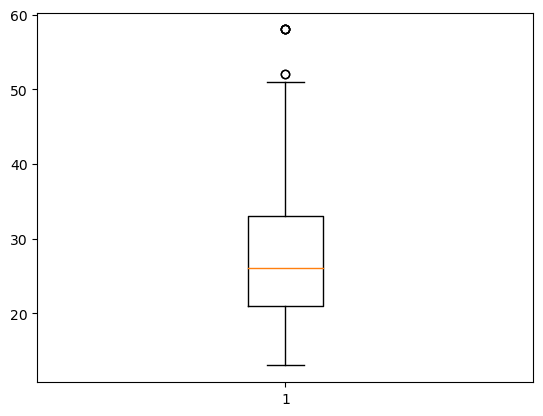

In [96]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x718b3600ced0>,
 'caps': [<matplotlib.lines.Line2D at 0x718b35ffc090>,
 'boxes': [<matplotlib.lines.Line2D at 0x718b3600c6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x718b35ffcbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x718b35ffc890>],
 'means': []}

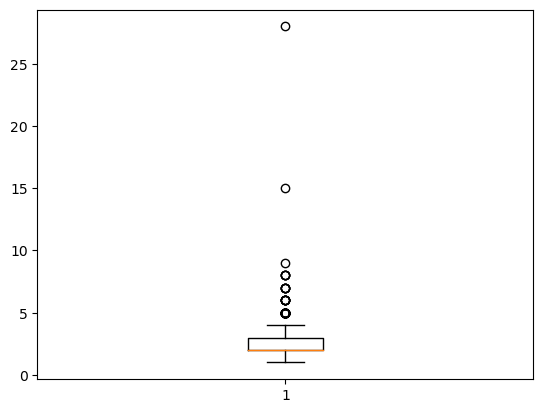

In [97]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['Numberofsexualpartners'])

{'whiskers': [<matplotlib.lines.Line2D at 0x718b35231ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x718b35231490>,
 'boxes': [<matplotlib.lines.Line2D at 0x718b35231e50>],
 'medians': [<matplotlib.lines.Line2D at 0x718b3523a4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x718b3523ae50>],
 'means': []}

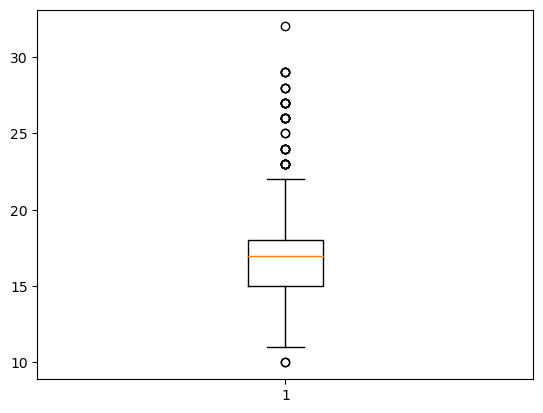

In [98]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['Firstsexualintercourse'])

{'whiskers': [<matplotlib.lines.Line2D at 0x718b35667b10>,
 'caps': [<matplotlib.lines.Line2D at 0x718b35667950>,
 'boxes': [<matplotlib.lines.Line2D at 0x718b35667a50>],
 'medians': [<matplotlib.lines.Line2D at 0x718b354c5790>],
 'fliers': [<matplotlib.lines.Line2D at 0x718b354c5990>],
 'means': []}

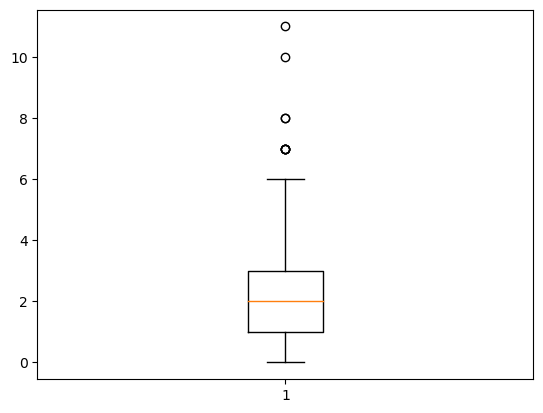

In [99]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['Numofpregnancies'])

{'whiskers': [<matplotlib.lines.Line2D at 0x718b35567750>,
 'caps': [<matplotlib.lines.Line2D at 0x718b3584a850>,
 'boxes': [<matplotlib.lines.Line2D at 0x718b35567cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x718b3584a6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x718b3584a090>],
 'means': []}

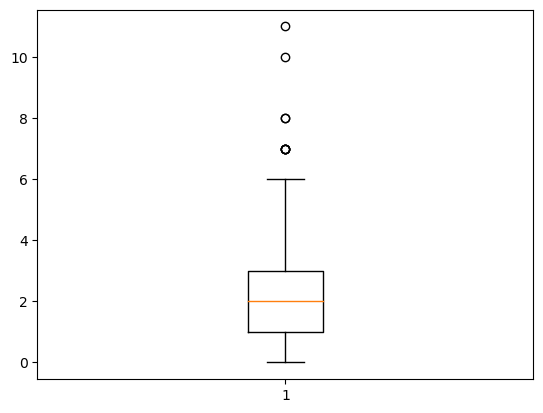

In [100]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['Numofpregnancies'])

{'whiskers': [<matplotlib.lines.Line2D at 0x718b3218ef90>,
 'caps': [<matplotlib.lines.Line2D at 0x718b321fd0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x718b3218e210>],
 'medians': [<matplotlib.lines.Line2D at 0x718b321fdb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x718b321fdc50>],
 'means': []}

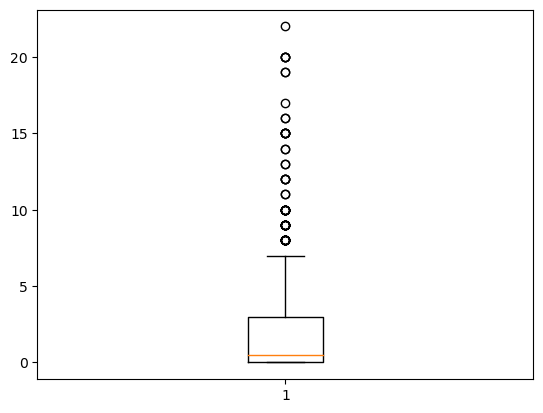

In [101]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['HormonalContraceptives(years)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x718b3320ded0>,
 'caps': [<matplotlib.lines.Line2D at 0x718b33265c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x718b3320db50>],
 'medians': [<matplotlib.lines.Line2D at 0x718b33265850>],
 'fliers': [<matplotlib.lines.Line2D at 0x718b332658d0>],
 'means': []}

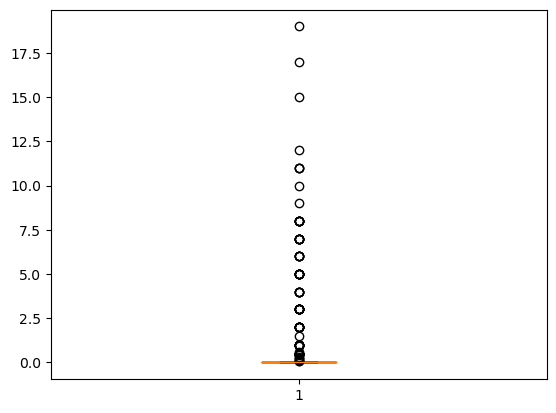

In [102]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['IUD(years)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x718b34d0e150>,
 'caps': [<matplotlib.lines.Line2D at 0x718b34ca4f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x718b34cb5310>],
 'medians': [<matplotlib.lines.Line2D at 0x718b34ca4f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x718b34ca4110>],
 'means': []}

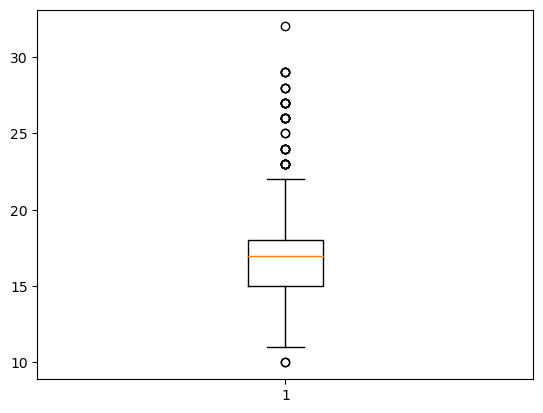

In [103]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['Firstsexualintercourse'])

{'whiskers': [<matplotlib.lines.Line2D at 0x718b34d1d350>,
 'caps': [<matplotlib.lines.Line2D at 0x718b34e6d850>,
 'boxes': [<matplotlib.lines.Line2D at 0x718b34e59490>],
 'medians': [<matplotlib.lines.Line2D at 0x718b34e6de10>],
 'fliers': [<matplotlib.lines.Line2D at 0x718b36147310>],
 'means': []}

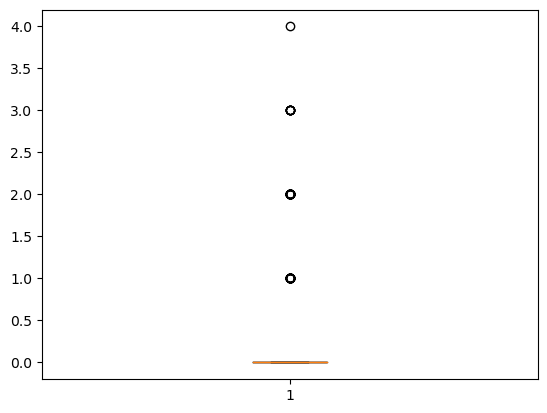

In [104]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['STDs(number)'])

In [105]:
corr_matrix = df.corr()
corr_matrix

,Age,Numberofsexualpartners,Firstsexualintercourse,Numofpregnancies,Smokes,HormonalContraceptives,HormonalContraceptives(years),IUD,IUD(years),STDs,...,IUDP,TSP,NPP,NSPP,NDP,YAHC,YAIUD,NPSP,IUDSY,HCSY
Age,1.000000,0.092922,0.368370,0.509887,0.047126,0.096696,0.309910,0.290586,0.226471,0.015038,...,0.178697,0.156905,0.005120,-0.248185,-0.083299,0.889557,0.960478,0.271512,0.136562,-0.062133
Numberofsexualpartners,0.092922,1.000000,-0.143618,0.091354,0.234797,0.012387,0.025972,0.030845,0.004472,0.056506,...,0.003290,0.100489,0.052326,0.898941,0.042338,0.079886,0.089071,-0.397388,0.000819,-0.071004
Firstsexualintercourse,0.368370,-0.143618,1.000000,-0.071799,-0.112212,0.030098,0.001601,-0.023148,-0.026614,-0.013921,...,-0.039806,-0.022749,-0.276222,-0.262805,-0.055465,0.368885,0.371760,0.053809,-0.049210,0.003165
Numofpregnancies,0.509887,0.091354,-0.071799,1.000000,0.078223,0.146937,0.207977,0.207264,0.150360,0.046349,...,0.133498,0.105708,0.819843,-0.098266,-0.006703,0.452849,0.502318,0.642290,0.106439,-0.032164
Smokes,0.047126,0.234797,-0.112212,0.078223,1.000000,-0.000554,0.049204,-0.058227,-0.036879,0.121318,...,-0.038423,0.299888,0.045333,0.195319,0.080973,0.037641,0.066537,-0.100033,-0.038455,0.010851
HormonalContraceptives,0.096696,0.012387,0.030098,0.146937,-0.000554,1.000000,0.452166,0.043606,-0.030754,-0.058415,...,-0.028181,0.013427,0.138621,-0.045738,-0.078003,-0.114199,0.086117,0.076649,-0.037268,0.419060
HormonalContraceptives(years),0.309910,0.025972,0.001601,0.207977,0.049204,0.452166,1.000000,0.100605,0.000782,0.000550,...,-0.015303,0.022441,0.073551,-0.091126,-0.051878,-0.132763,0.293365,0.078622,-0.028926,0.634585
IUD,0.290586,0.030845,-0.023148,0.207264,-0.058227,0.043606,0.100605,1.000000,0.745428,0.045557,...,0.756556,0.016756,0.080311,-0.069401,0.001076,0.244074,0.114852,0.117859,0.742440,-0.048493
IUD(years),0.226471,0.004472,-0.026614,0.150360,-0.036879,-0.030754,0.000782,0.745428,1.000000,0.017933,...,0.979491,0.021439,0.048602,-0.067303,-0.010105,0.221490,-0.007771,0.088695,0.891873,-0.077708
STDs,0.015038,0.056506,-0.013921,0.046349,0.121318,-0.058415,0.000550,0.045557,0.017933,1.000000,...,0.020322,-0.001292,0.059366,0.038786,0.826711,0.010594,0.006641,-0.024217,0.029359,-0.011639


In [ ]:
plt.figure(figsize =(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
print("Hinselmann Classifier")
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df, target_Hin, test_size=0.4, random_state=1) # 60% training and 40% test
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm=LinearSVC(max_iter=10000)
model_svm=CalibratedClassifierCV(model_svm)
model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


print("SVM Classifier Evaluation Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)
knn_neighbors={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
from sklearn.model_selection import GridSearchCV
classifier=GridSearchCV(knn,param_grid=knn_neighbors,verbose=0).fit(X_train,y_train)
classifier.best_params_
best_grid=classifier.best_estimator_
best_grid
y_pred=best_grid.predict(X_test)

print("KNN Classifier Evaluation Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()

In [ ]:
print("Cytology Classifier")
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df, target_Sch, test_size=0.4, random_state=1) # 60% training and 40% test
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm=LinearSVC(max_iter=10000)
model_svm=CalibratedClassifierCV(model_svm)
model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("SVM Classifier Evaluation Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()  
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)
knn_neighbors={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
from sklearn.model_selection import GridSearchCV
classifier=GridSearchCV(knn,param_grid=knn_neighbors,verbose=0).fit(X_train,y_train)
classifier.best_params_
best_grid=classifier.best_estimator_
# best_grid
y_pred=best_grid.predict(X_test)


print("KNN Classifier Evaluation Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()


In [2]:
print("Schiller Classifier")
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df, target_Cit, test_size=0.4, random_state=1) # 60% training and 40% test
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm=LinearSVC(max_iter=10000)
model_svm=CalibratedClassifierCV(model_svm)
model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("SVM Classifier Evaluation Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)
knn_neighbors={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
from sklearn.model_selection import GridSearchCV
classifier=GridSearchCV(knn,param_grid=knn_neighbors,verbose=0).fit(X_train,y_train)
classifier.best_params_
best_grid=classifier.best_estimator_
best_grid
y_pred=best_grid.predict(X_test)
print("KNN Classifier Evaluation Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()

Schiller Classifier


NameError: name 'df' is not defined

In [1]:
print("Biopsy Classifier")
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df, target_Bio, test_size=0.4, random_state=1) # 60% training and 40% test
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm=LinearSVC(max_iter=10000)
model_svm=CalibratedClassifierCV(model_svm)
model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("SVM Classifier Evaluation Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs=-1)
knn_neighbors={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
from sklearn.model_selection import GridSearchCV
classifier=GridSearchCV(knn,param_grid=knn_neighbors,verbose=0).fit(X_train,y_train)
classifier.best_params_
best_grid=classifier.best_estimator_
best_grid
y_pred=best_grid.predict(X_test)
print("KNN Classifier Evaluation Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.show()

Biopsy Classifier


NameError: name 'df' is not defined